In [ ]:
### importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### reading dataset

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [ ]:
df.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [ ]:
df.shape

(15681, 18)

In [ ]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


EDA

check for null values

In [ ]:
df.isnull()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
15679,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

Null Values are present in ['popularity','danceability','duration_ms','energy','instrumentalness,'loudness','voice_gender','mode','speechiness','musician_category', 'valance']

In [ ]:
df.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

In [ ]:
# Filling null values in voice_gender, musician_category and mode

df['mode'].fillna(df['mode'].mode()[0], inplace=True)
df['musician_category'].fillna(df['musician_category'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

instance_id            0
track_name             0
popularity           642
acousticness           0
danceability         556
duration_ms           94
energy                94
instrumentalness      95
key                    0
liveness               0
loudness              36
voice_gender         765
mode                   0
speechiness           26
tempo                  0
musician_category      0
valence              677
music_genre            0
dtype: int64

In [ ]:
#to fill null values for numerical coulmns, we use mean
null_list=['danceability','popularity','duration_ms','energy','instrumentalness','loudness','speechiness','valence']
for column in null_list:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df.isnull().sum()

instance_id            0
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
voice_gender         765
mode                   0
speechiness            0
tempo                  0
musician_category      0
valence                0
music_genre            0
dtype: int64

 Graphs

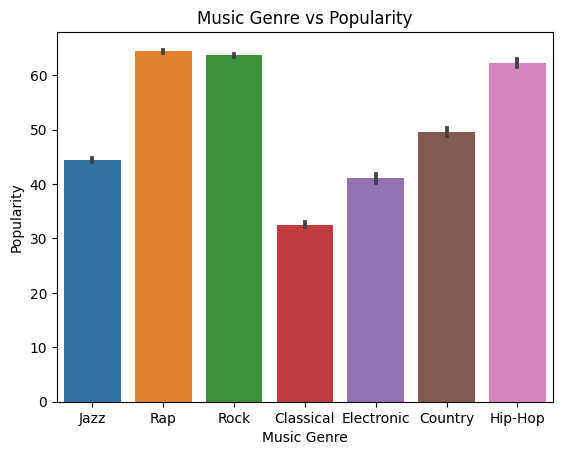

In [ ]:

#plt.figure(figsize=(12, 6))
sns.barplot(x='music_genre', y='popularity', data=df)
plt.xlabel('Music Genre')
plt.ylabel('Popularity')
plt.title('Music Genre vs Popularity')
plt.show()


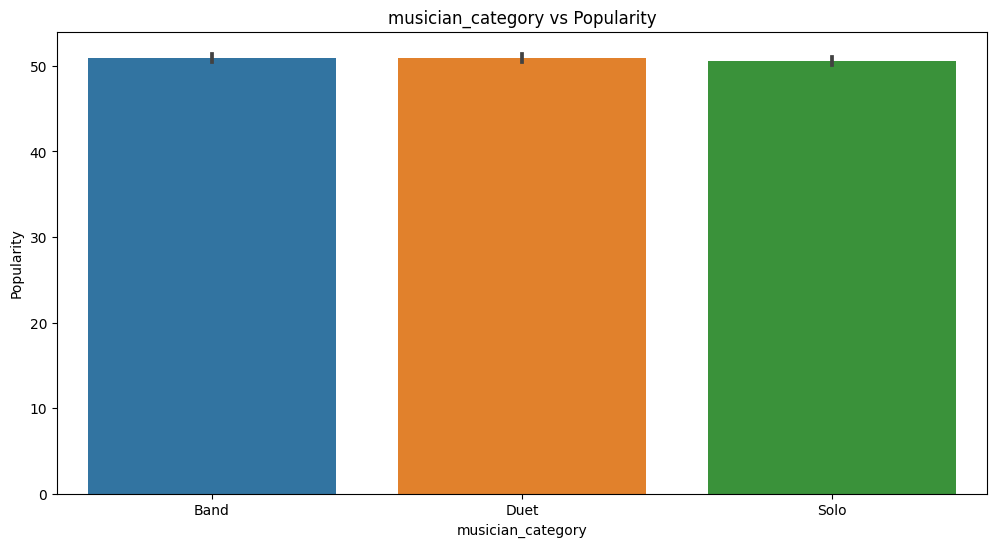

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='musician_category', y='popularity', data=df)
plt.xlabel('musician_category')
plt.ylabel('Popularity')
plt.title('musician_category vs Popularity')
plt.show()


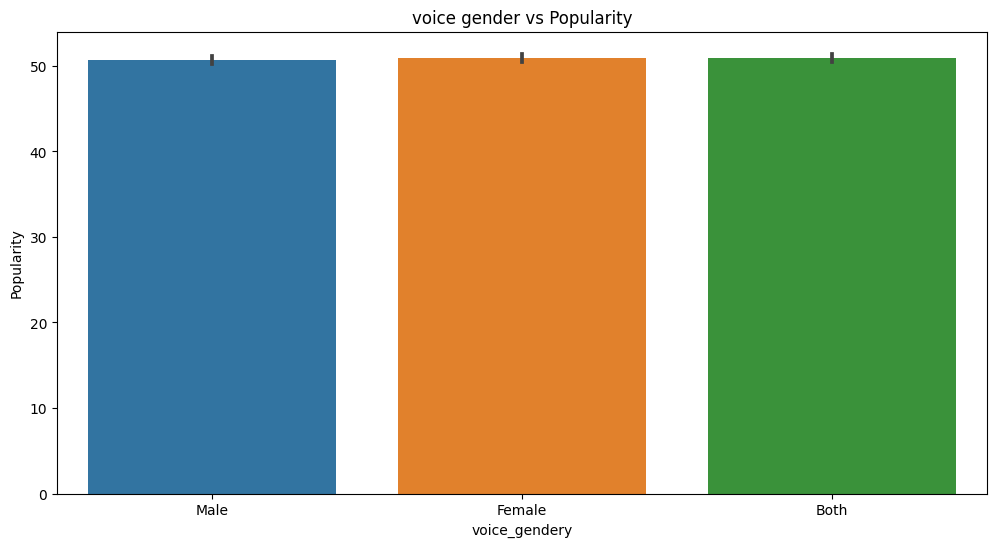

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='voice_gender', y='popularity', data=df)
plt.xlabel('voice_gendery')
plt.ylabel('Popularity')
plt.title('voice gender vs Popularity')
plt.show()


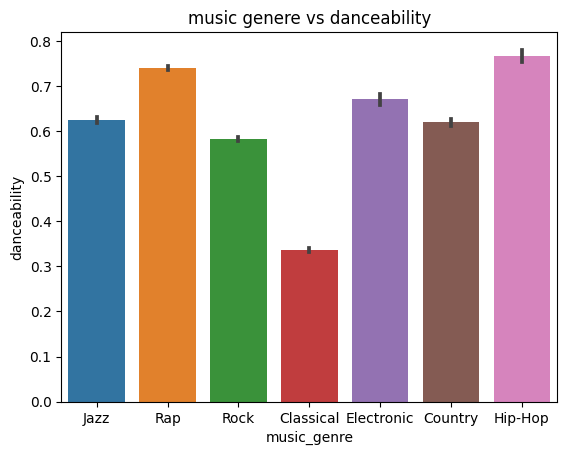

In [ ]:
sns.barplot(x='music_genre', y='danceability', data=df)
plt.xlabel('music_genre')
plt.ylabel('danceability')
plt.title('music genere vs danceability')
plt.show()

In [ ]:
### correlation matrix

<ipython-input-81-52af7537305c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


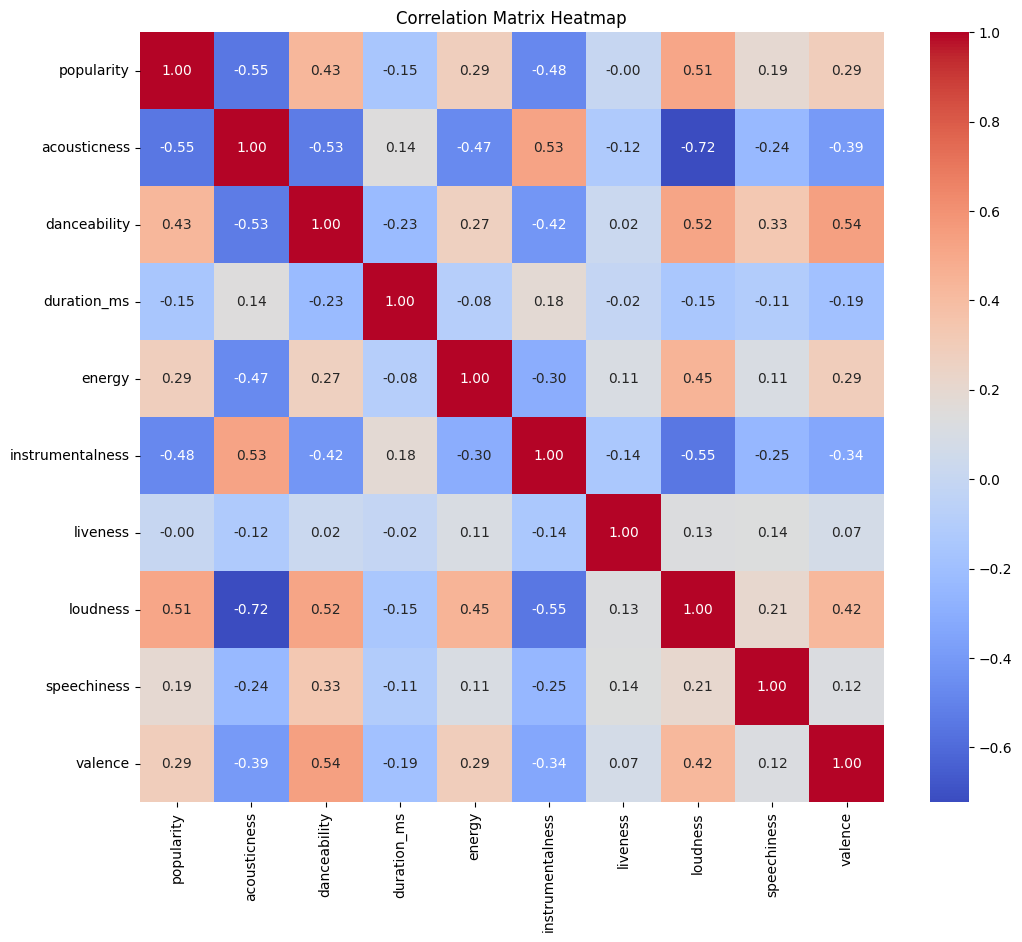

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Data Preprocessing

Encoding

In [ ]:
df.dtypes

instance_id           object
track_name            object
popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                   object
liveness             float64
loudness             float64
voice_gender          object
mode                  object
speechiness          float64
tempo                 object
musician_category     object
valence              float64
music_genre           object
dtype: object

In [ ]:
cat_cols=['instance_id','track_name','key','voice_gender','mode','tempo','musician_category','music_genre']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoded_df = df.copy()
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        label_encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))



In [ ]:
df1=label_encoded_df

In [ ]:
df1.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,3659,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,541,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,14449,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,2023,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,11036,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [ ]:

label_encoded_df_columns = df.copy()
label_encoders = {}



In [ ]:
cat_cols = ['instance_id', 'key', 'voice_gender', 'mode', 'tempo', 'musician_category', 'music_genre']

In [ ]:
for column in cat_cols:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        label_encoded_df_columns[column] = le.fit_transform(df[column])
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))


In [ ]:
label_encoded_df_columns.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [ ]:
df2=label_encoded_df_columns.copy()

In [ ]:
df2.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [ ]:
### Feature reduction

<ipython-input-94-cf88801d4d38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


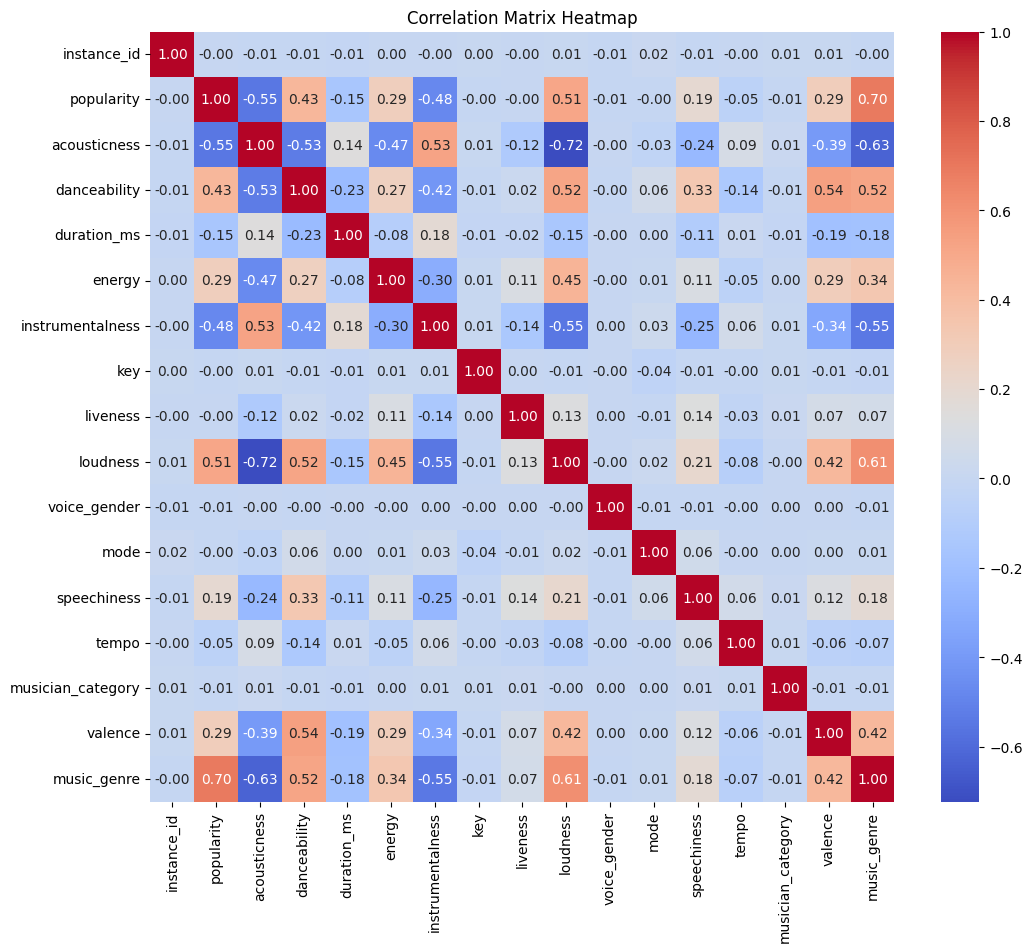

In [ ]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df2.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,13864,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,452,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,9240,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,12348,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,11290,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [ ]:
df2=df2.drop('track_name',axis=1)

In [ ]:
df2=df2.drop('instance_id',axis=1)

In [ ]:
df2.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence',
       'music_genre'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df2.drop('popularity', axis=1)
y = df2['popularity']


In [ ]:
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,5291,0,0.598965,4
1,1.009380,0.687542,216232.195,0.265942,0.000030,0,0.174655,-13.716,2,0,0.039949,12331,0,0.357194,4
2,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,615,0,0.635525,5
3,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,12331,1,0.983750,6
4,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,1466,0,0.074412,0


In [ ]:
y.head()

0    49.178
1    59.827
2    89.023
3    55.762
4    45.095
Name: popularity, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df2.dtypes

popularity           float64
acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
instrumentalness     float64
key                    int64
liveness             float64
loudness             float64
voice_gender           int64
mode                   int64
speechiness          float64
tempo                  int64
musician_category      int64
valence              float64
music_genre            int64
dtype: object

Linear Regression model


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 140.73412638621716
R-squared (R2): 0.509220643209549


knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 302.4891111568329
R-squared (R2): -0.05486434045328137


In [ ]:
### random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 108.3968018402407
R-squared (R2): 0.6219899604215302


decided to use random forest

In [ ]:
###hyperparameter tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
p_dis = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}



In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    rf, param_distributions=p_dis, n_iter=2, cv=5, n_jobs=-1, random_state=42
)


In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42)

In [ ]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 70, 'bootstrap': False}


In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
best_params = {
    'n_estimators': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_depth': 70,
    'bootstrap': False
}

In [ ]:
best_rf_regressor = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_depth=best_params['max_depth'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

In [ ]:
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=70, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=20, random_state=42)

In [ ]:
y_pred = best_rf_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 195.31768715987678
R-squared (R2): 0.31887246302251004


hence done